In [11]:

# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
from pprint import pprint

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit.providers.ibmq import least_busy 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [12]:
# using local qasm simulator
backend = Aer.get_backend('qasm_simulator')  

# using IBMQ qasm simulator 
# backend = IBMQ.get_backend('ibmq_qasm_simulator')
# using real device
# backend = least_busy(IBMQ.backends(simulator=False))

flag_qx2 = True
if backend.name() == 'ibmqx4':
        flag_qx2 = False
        
print("Your choice for the backend is: ", backend, "flag_qx2 is: ", flag_qx2)

Your choice for the backend is:  qasm_simulator flag_qx2 is:  True


In [13]:

# Here, two useful routine
# Define a F_gate
def F_gate(circ,q,i,j,n,k) :
    theta = np.arccos(np.sqrt(1/(n-k+1)))
    circ.ry(-theta,q[j])       
    circ.cz(q[i],q[j])
    circ.ry(theta,q[j])
    circ.barrier(q[i])
# Define the cxrv gate which uses reverse CNOT instead of CNOT
def  cxrv(circ,q,i,j) :
    circ.h(q[i])
    circ.h(q[j])
    circ.cx(q[j],q[i])
    circ.h(q[i])
    circ.h(q[j])
    circ.barrier(q[i],q[j])

start W state 5-qubit on qasm_simulator N= 1024 23/07/2020 13:51:55
end   W state 5-qubit on qasm_simulator N= 1024 23/07/2020 13:51:55


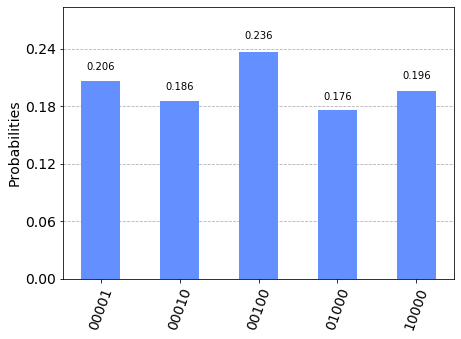

In [14]:

# 5-qubit W state
n = 5
q = QuantumRegister(n) 
c = ClassicalRegister(n)
W_states = QuantumCircuit(q,c) 

W_states.x(q[4]) #start is |10000>
F_gate(W_states,q,4,3,5,1) # Applying F12
F_gate(W_states,q,3,2,5,2) # Applying F23
F_gate(W_states,q,2,1,5,3) # Applying F34
F_gate(W_states,q,1,0,5,4) # Applying F45
W_states.cx(q[3],q[4]) # cNOT 21
cxrv(W_states,q,2,3)   # cNOT 32
if flag_qx2 : # option ibmqx2 
    W_states.cx(q[1],q[2]) # cNOT 43
    W_states.cx(q[0],q[1]) # cNOT 54
    
else :        # option ibmqx4 
    cxrv(W_states,q,1,2)
    cxrv(W_states,q,0,1)     
    
for i in range(5) :
    W_states.measure(q[i] , c[i]) 

shots = 1024
time_exp = time.strftime('%d/%m/%Y %H:%M:%S')
print('start W state 5-qubit on', backend, "N=", shots,time_exp)
result = execute(W_states, backend=backend, shots=shots)
time_exp = time.strftime('%d/%m/%Y %H:%M:%S')
print('end   W state 5-qubit on', backend, "N=", shots,time_exp)
plot_histogram(result.result().get_counts(W_states))

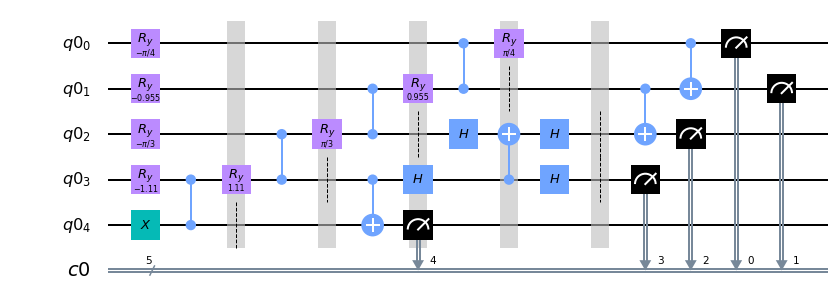

In [15]:
%matplotlib inline
W_states.draw(output='mpl')